In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # sets theme of the plot
%matplotlib inline #plots graph within the document

In [4]:
df = pd.read_csv('netflix.csv')

In [5]:
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratinglevel        941 non-null    object 
 3   ratingdescription  1000 non-null   int64  
 4   release_year       1000 non-null   int64  
 5   user_rating_score  605 non-null    float64
 6   user_rating_size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [7]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(246, 7)

In [9]:
# visualize pairplot of df

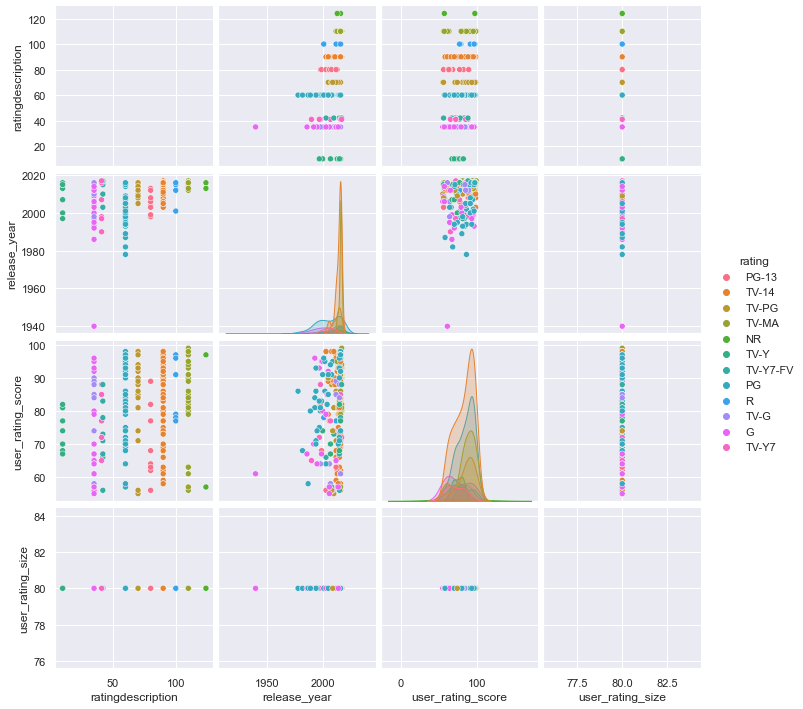

In [10]:
sns.pairplot(df,hue='rating')

In [11]:
df.describe()

,ratingdescription,release_year,user_rating_score,user_rating_size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


In [12]:
# a . Groupby

In [13]:
# I. Splitting the data into groups

In [14]:
# grouping by year

In [15]:
df_by_year = df.groupby('release_year')

In [ ]:
# II - apply a fucntion to each group individually

In [16]:
df_by_year.describe().head()

ratingdescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release_year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user_rating_score        ...             user_rating_size        \
                         count  mean  ...   75%   max            count  mean   
release_year                          ...                                      
1940                       1.0  61.0  ...  61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...  86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...  68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...  67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...  58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release_year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [18]:
list(df_by_year)[0]

(1940,
         title rating                                ratinglevel  \
 761  Fantasia      G  General Audiences. Suitable for all ages.   
 
      ratingdescription  release_year  user_rating_score  user_rating_size  
 761                 35          1940               61.0                80  )

In [19]:
# III - Combining the result into a data structure

In [22]:
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingdescription,user_rating_score,user_rating_size
release_year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [23]:
# plotting user_rating_score wet year

Text(0, 0.5, 'median rating')

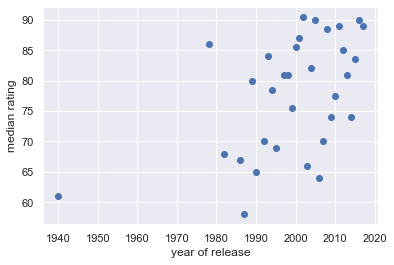

In [25]:
df_rat_by_year = df_med_by_year['user_rating_score']
plt.scatter(df_rat_by_year.index,df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating')